In [34]:
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.sankey import Sankey
from bokeh.plotting import figure, output_file, show
from bokeh.palettes import magma
from scipy import stats
dat = pd.read_csv('Music-and-Therapy-survey-1.csv')


In [35]:
dat.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


# Detecting Missing Values

# data my be missing due to some reasons:
1. user forgot to fill in a field.
2. Data was lost while transferring manually from a legacy database.
3. There was a programming error.
4. Users chose not to fill out a field tied to their beliefs about how the results would be used or interpreted.
# Finding missing values procudures.
1. load the data frame and study the structure of the data frame
2. Separate categorical and numerical columns in the data frame
3. Find the missing values
# Finding missing values in the data frame using Python
1. Use isnull() function to identify the missing values in the data frame
2. Use sum() functions to get sum of all missing values per column.
3. use sort_values(ascending=False) function to get columns with the missing values in descending order.
4. Divide by len(df) to get % of missing values in each column.

In [65]:
#Separate categorical and numerical columns in the data frame
dat.dtypes == 'objects'

Timestamp                       False
Age                             False
Primary streaming service       False
Hours per day                   False
While working                   False
Instrumentalist                 False
Composer                        False
Fav genre                       False
Exploratory                     False
Foreign languages               False
BPM                             False
Frequency [Classical]           False
Frequency [Country]             False
Frequency [EDM]                 False
Frequency [Folk]                False
Frequency [Gospel]              False
Frequency [Hip hop]             False
Frequency [Jazz]                False
Frequency [K pop]               False
Frequency [Latin]               False
Frequency [Lofi]                False
Frequency [Metal]               False
Frequency [Pop]                 False
Frequency [R_B]                 False
Frequency [Rap]                 False
Frequency [Rock]                False
Frequency [V

In [67]:
num_vars = dat.columns[dat.dtypes !='objects']
cat_vars = dat.columns[dat.dtypes =='objects']
print(num_vars)
print(cat_vars)

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R_B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')
Index([], dtype='object')


In [69]:
dat[num_vars].isnull().sum()

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R_B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

In [74]:
dat[num_vars].isnull().sum().sort_values(ascending=False)

BPM                             107
Music effects                     8
Instrumentalist                   4
Foreign languages                 4
While working                     3
Primary streaming service         1
Composer                          1
Age                               1
Frequency [Video game music]      0
Frequency [Pop]                   0
Frequency [R_B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Timestamp                         0
Anxiety                           0
Depression                        0
Frequency [Lofi]                  0
Insomnia                          0
OCD                               0
Frequency [Metal]                 0
Frequency [Hip hop]               0
Frequency [Latin]                 0
Frequency [K pop]                 0
Frequency [Jazz]                  0
Frequency [Gospel]                0
Frequency [Folk]                  0
Frequency [EDM]                   0
Frequency [Country]         

In [76]:
dat[num_vars].isnull().sum().sort_values(ascending=False)/len(dat)

BPM                             0.145380
Music effects                   0.010870
Instrumentalist                 0.005435
Foreign languages               0.005435
While working                   0.004076
Primary streaming service       0.001359
Composer                        0.001359
Age                             0.001359
Frequency [Video game music]    0.000000
Frequency [Pop]                 0.000000
Frequency [R_B]                 0.000000
Frequency [Rap]                 0.000000
Frequency [Rock]                0.000000
Timestamp                       0.000000
Anxiety                         0.000000
Depression                      0.000000
Frequency [Lofi]                0.000000
Insomnia                        0.000000
OCD                             0.000000
Frequency [Metal]               0.000000
Frequency [Hip hop]             0.000000
Frequency [Latin]               0.000000
Frequency [K pop]               0.000000
Frequency [Jazz]                0.000000
Frequency [Gospe

In [68]:
dat[num_vars]

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R_B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


In [64]:
# making new data frame with dropped NA values 
new_dat = dat.dropna(axis = 0, how ='any')     
new_dat

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R_B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
2,8/27/2022 21:28,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
5,8/27/2022 21:56,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.
6,8/27/2022 22:00,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


In [59]:
dat.columns=dat.columns.str.replace('&','_')
dat.head()


,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R_B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [36]:
#missing values
null = pd.isnull(dat)
null.head()


,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [37]:
#counting the total number of missing values
pd.isnull(dat).sum().sum()

129

# Outliers
An outlier is a data point in a data set that is distant from all other observations. outliers are the extreme values within the dataset.

# An outlier could exist in a dataset due to
1. Variability in the data
2. An experimental measurement error

# ways to identify an outlier
1. using scatter plots
2. using Z score
3. using the IQR interquartile range


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Hours per day', ylabel='Density'>

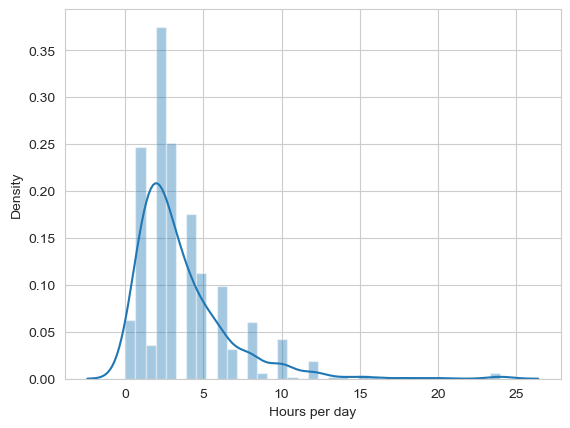

In [38]:
#outliers in hoyrs per day
sns.distplot(dat['Hours per day'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Age'>

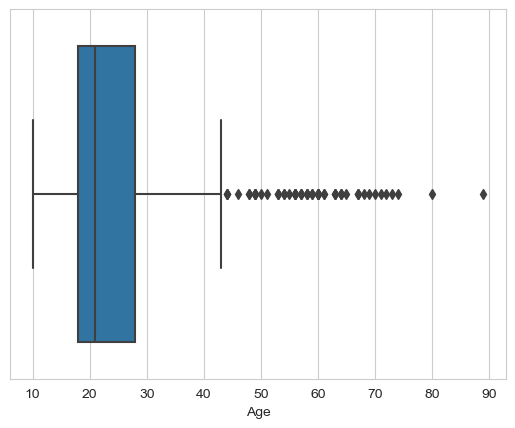

In [39]:
#outliers in Age
sns.boxplot(dat['Age'])

# Boxplot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Hours per day'>

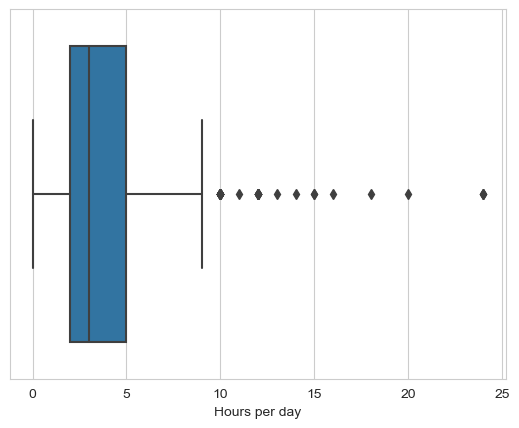

In [40]:
#Boxplot in hours per day
sns.boxplot(dat['Hours per day'])

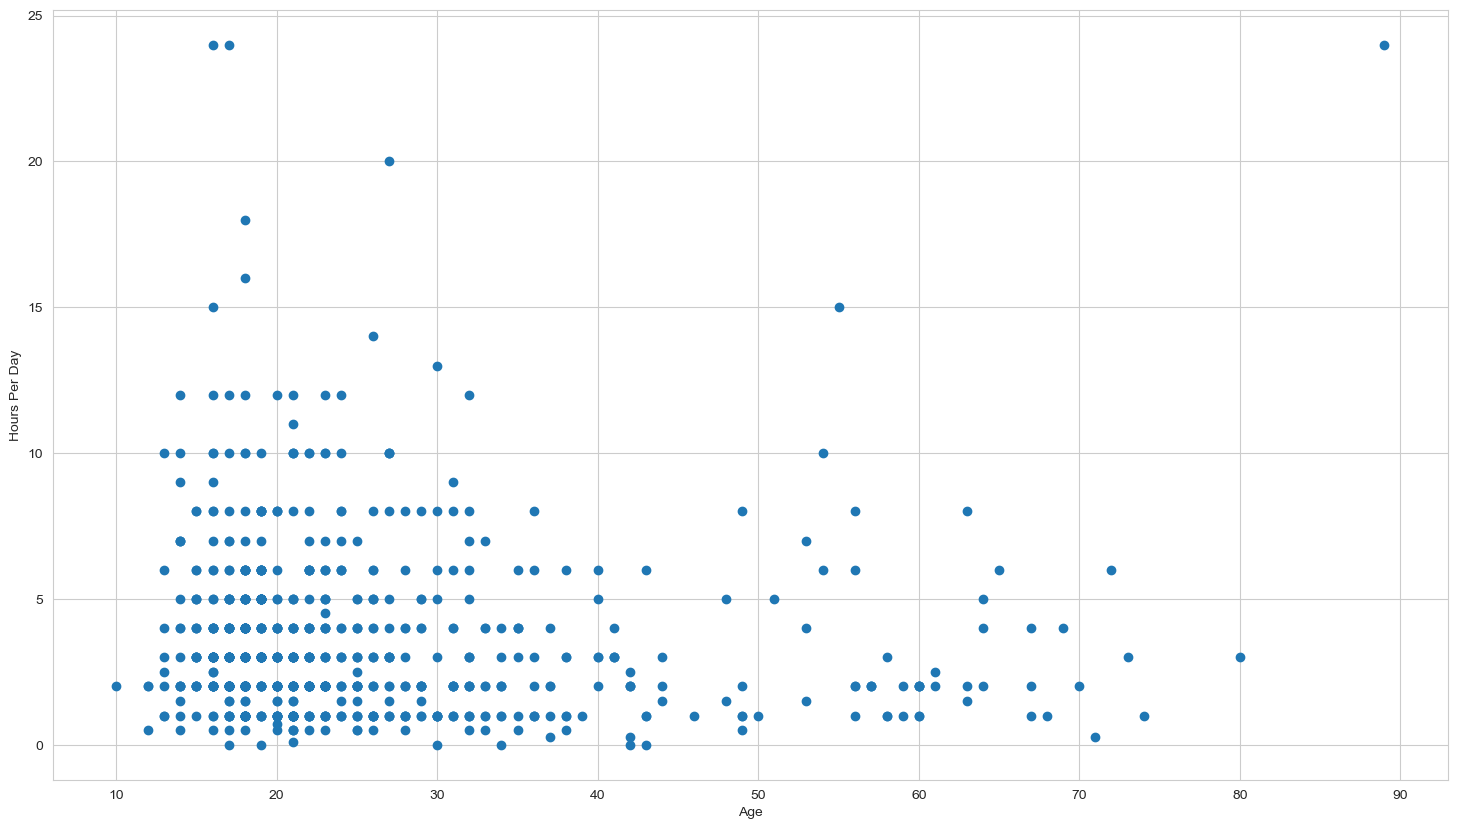

In [41]:
# Scatter plot
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(dat['Age'], dat['Hours per day'])
 
# x-axis label
ax.set_xlabel('Age')
 
# y-axis label
ax.set_ylabel('Hours Per Day')
plt.show()

In [42]:
z = np.abs(stats.zscore(dat['Depression']))
print(z)

0      1.584570
1      0.923809
2      0.728094
3      0.728094
4      0.923809
         ...   
731    0.397714
732    0.923809
733    0.923809
734    0.593428
735    0.923809
Name: Depression, Length: 736, dtype: float64


In [43]:
z = np.abs(stats.zscore(dat['Hours per day']))
print(z)

0      0.189270
1      0.684951
2      0.141184
3      0.354497
4      0.141184
         ...   
731    0.519724
732    0.850178
733    0.802091
734    0.471638
735    0.519724
Name: Hours per day, Length: 736, dtype: float64


In [44]:
z = np.abs(stats.zscore(dat['Anxiety']))
print(z)

0      1.016652
1      0.416445
2      0.416445
3      1.132994
4      0.416445
         ...   
731    0.416445
732    1.016652
733    1.374927
734    1.374927
735    1.374927
Name: Anxiety, Length: 736, dtype: float64


# Visualization

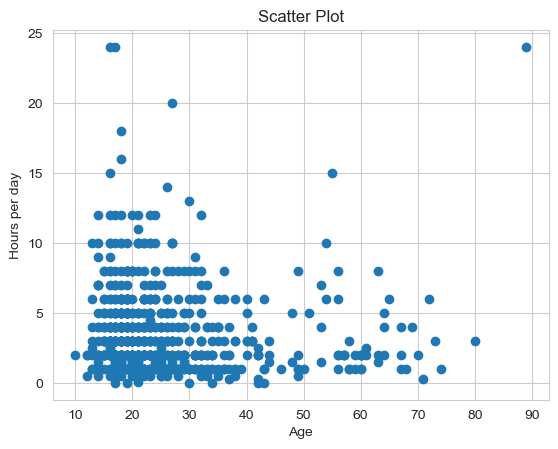

In [45]:
#Scatter plot of age against hours per day
plt.scatter(dat['Age'], dat['Hours per day'])
plt.title("Scatter Plot")
plt.xlabel('Age')
plt.ylabel('Hours per day')
 
plt.show()

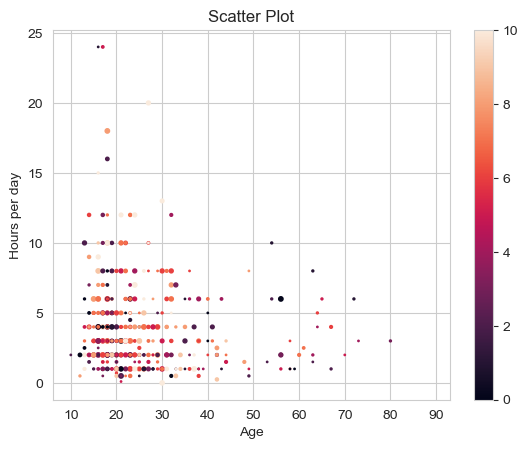

In [46]:
#scatter plot showing data of depression on age against hours per day
plt.scatter(dat['Age'], dat['Hours per day'], c=dat['Depression'],
            s=dat['OCD'])
 
plt.title("Scatter Plot")
 
plt.xlabel('Age')
plt.ylabel('Hours per day')
 
plt.colorbar()
 
plt.show()

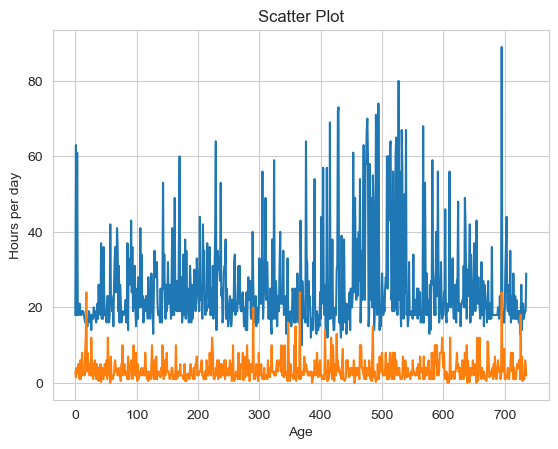

In [47]:
plt.plot(dat['Age'])
plt.plot(dat['Hours per day'])
 
plt.title("Scatter Plot")

plt.xlabel('Age')
plt.ylabel('Hours per day')
 
plt.show()

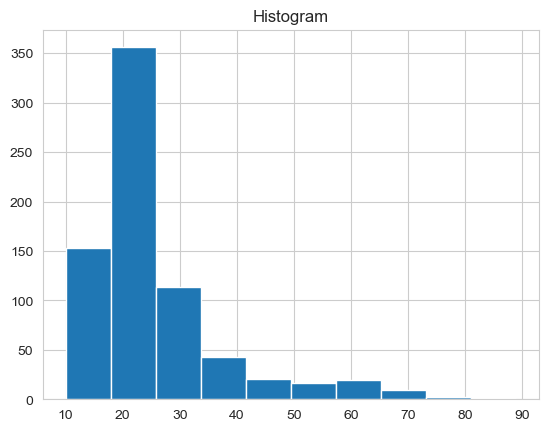

In [48]:
#histogram
plt.hist(dat['Age'])
 
plt.title("Histogram")

plt.show()

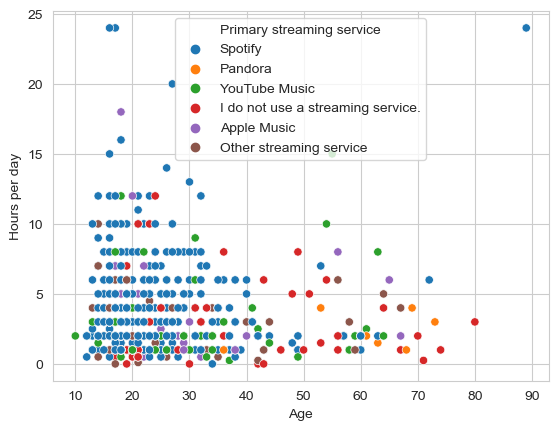

In [49]:
#scatterplot showing primary streaming service on age against hour per day
sns.scatterplot(x='Age', y='Hours per day', data=dat,
               hue='Primary streaming service')
plt.show()

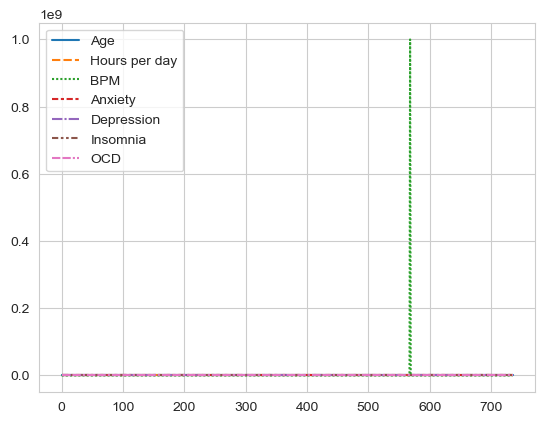

In [50]:
#lineplot of primary streaming service
sns.lineplot(data=dat.drop(['Primary streaming service'], axis=1))
plt.show()

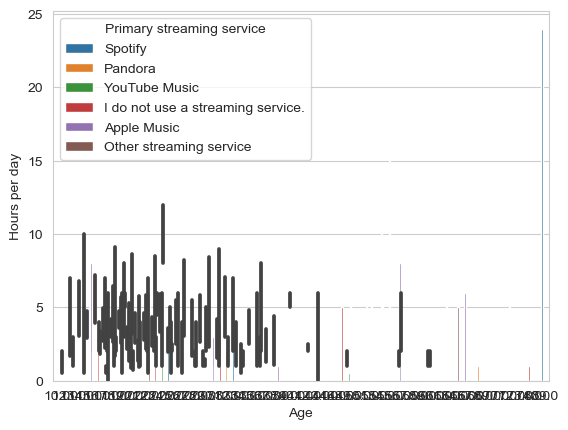

In [51]:
#barplot of primary streaming service on age against hours per day
sns.barplot(x='Age',y='Hours per day', data=dat,
            hue='Primary streaming service')
 
plt.show()

# Boxplot

<AxesSubplot:title={'center':'Hours per day'}, xlabel='Age'>

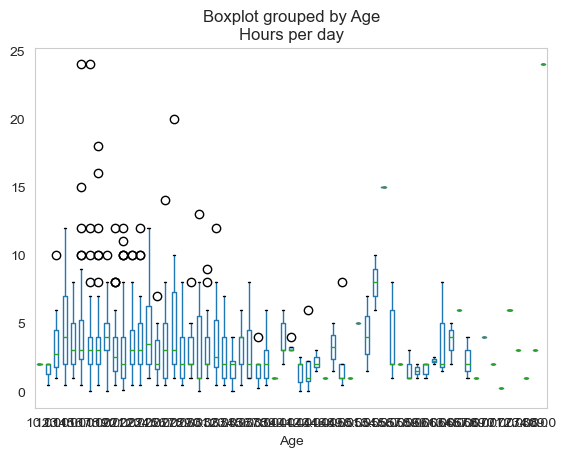

In [52]:
#boxplot grouped by age
dat.boxplot(by ='Age', column =['Hours per day'], grid = False)

<AxesSubplot:title={'center':'Age'}, xlabel='Primary streaming service'>

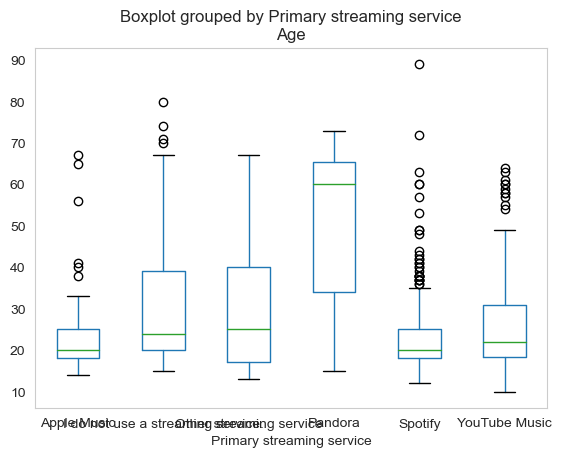

In [53]:
#boxplot grouped by primary streaming service
dat.boxplot(by ='Primary streaming service', column =['Age'], grid = False)

<AxesSubplot:xlabel='Age', ylabel='Primary streaming service'>

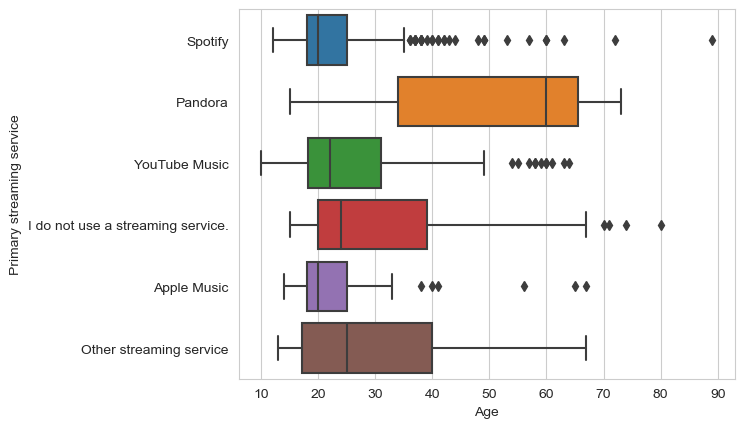

In [54]:
# subplot on Primary streaming service  against age 
sns.set_style("whitegrid")
  
sns.boxplot(x = 'Age', y = 'Primary streaming service', data = dat)

<AxesSubplot:xlabel='Hours per day', ylabel='Age'>

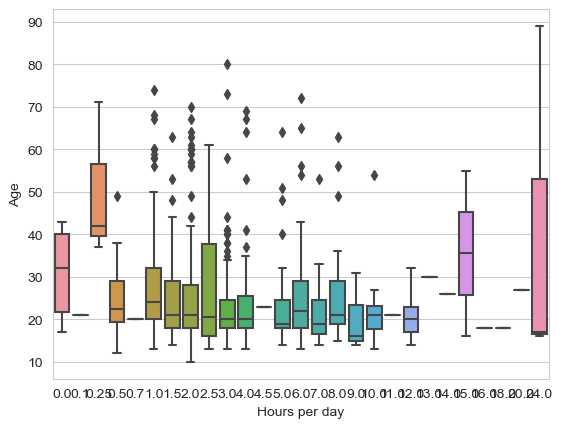

In [55]:
#set_style 
sns.set_style("whitegrid")
  
sns.boxplot(x = 'Hours per day', y = 'Age', data = dat)

# Bubble chart

In [56]:
#buble chart age vs fav genre
fig = px.scatter(dat, x="Age", y="Fav genre",)
fig.update_layout(title_text='FAV GENRE VS AGE', title_x=0.5)
fig.show()

In [57]:
#bubble chart hours per day vs primary streaming service 
fig = px.scatter(dat, x="Hours per day", y="Primary streaming service")
fig.show()

# Tree Map

In [33]:
# Simple treemap showing country level data and sizing the rectangles based on the pop field
px.treemap(dat, path=['Fav genre'], values='Age')

ValueError: Value of 'values' is not the name of a column in 'data_frame'. Expected one of ['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'] but received: Age